<a href="https://colab.research.google.com/github/Sujan-Sawant/Netflix-Case-Study/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX Case Study**

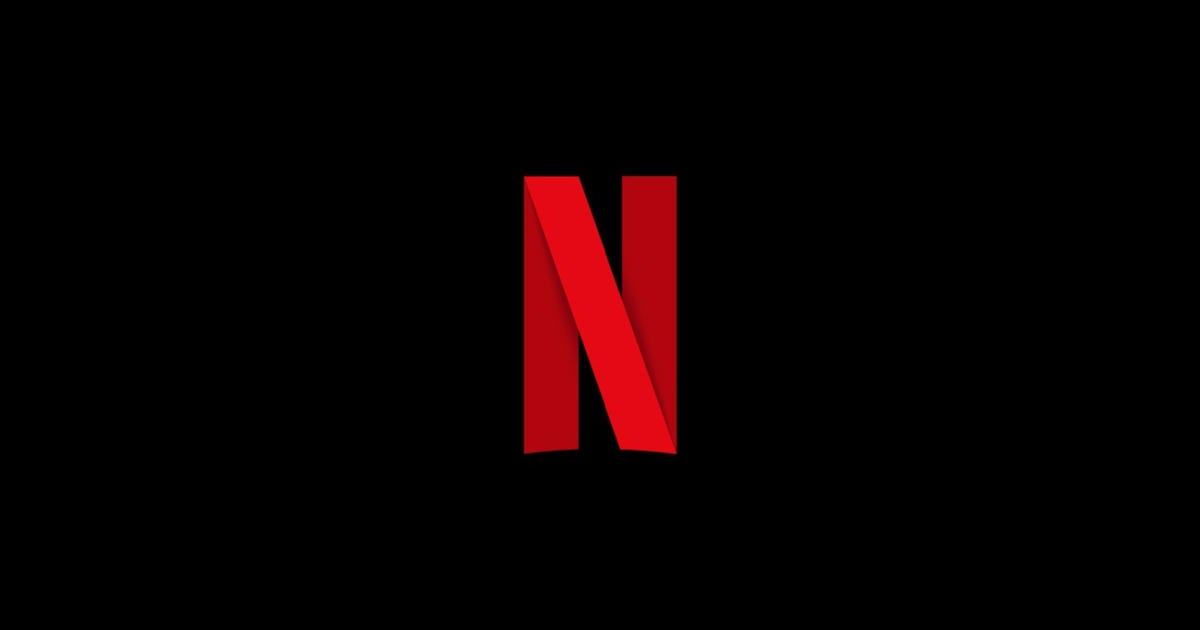

## Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

------

In [ ]:
# Downloding the data
!gdown 1GbSYZJ9EQDD8NUfClf9RZxWGLSiXiXsA

Downloading...
From: https://drive.google.com/uc?id=1GbSYZJ9EQDD8NUfClf9RZxWGLSiXiXsA
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 116MB/s]


-------------

In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("netflix.csv")

------------

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


------------

In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


------------

## Exploratory Data Analysis and Data Cleaning (EDA)

In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).

df.shape

(8807, 12)

There are 8807 rows and 12 columns present in the DataFrame "df".



------------

In [ ]:
# Retrieving the column labels (names) of a DataFrame .

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**The dataset consists the following columns with description:**
- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description


------------

In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


------------

In [ ]:
# Display the data type of each column in a DataFrame

df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

------------

In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

------------

In [ ]:
# Display count of unique values for each column

for col in df.columns:
  print(col)
  print(df[col].nunique())
  print("-" * 90)

show_id
8807
------------------------------------------------------------------------------------------
type
2
------------------------------------------------------------------------------------------
title
8807
------------------------------------------------------------------------------------------
director
4528
------------------------------------------------------------------------------------------
cast
7692
------------------------------------------------------------------------------------------
country
748
------------------------------------------------------------------------------------------
date_added
1767
------------------------------------------------------------------------------------------
release_year
74
------------------------------------------------------------------------------------------
rating
17
------------------------------------------------------------------------------------------
duration
220
-----------------------------------------------------------

------------

In [ ]:
# First drop rows for "date_added" column,rest columns we deal later when we needed.

df.dropna(subset = "date_added",axis = 0,inplace =True)

In [ ]:
# converting date_added column data type from object to datetime.
# and creating two new column out of it added_month and added_year.

df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Extracting month and year into separate columns
df["added_month"] = df["date_added"].dt.month
df["added_year"] = df["date_added"].dt.year


In [ ]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
added_month            float64
added_year             float64
dtype: object

**The column "date_added" converted from an object data type to a datetime data type.**

**Also, two new columns, "added_month" and "added_year", created out of it with integer data types.**


------------

In [ ]:
# Changing data type to int

df["added_month"] = df["added_month"].astype(int)
df["added_year"] = df["added_year"].astype(int)


In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,2021


In [ ]:
df.iloc[:,-5:]

,duration,listed_in,description,added_month,added_year
0,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021
...,...,...,...,...,...
8802,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,2019
8803,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,2019
8804,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,2019
8805,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,2020


------------

In [ ]:
# Retrieving summary of a DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8709 non-null   object        
 1   type          8709 non-null   object        
 2   title         8709 non-null   object        
 3   director      6168 non-null   object        
 4   cast          7892 non-null   object        
 5   country       7882 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8709 non-null   int64         
 8   rating        8705 non-null   object        
 9   duration      8706 non-null   object        
 10  listed_in     8709 non-null   object        
 11  description   8709 non-null   object        
 12  added_month   8709 non-null   int64         
 13  added_year    8709 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1020.6+ KB


**It consists of:**
- The index dtype and number of rows.
- The number of columns and their names.
- The count of non-null values in each column.
- The data types of each column.
- The memory usage of the DataFrame.

--------

In [ ]:
# Check for duplicate records
df.duplicated().sum()

0

No Duplicate records are present in DataFrame.

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2541
cast             817
country          827
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
added_month        0
added_year         0
dtype: int64

In [ ]:
# Percentage of null values.

round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending = False)


director        29.18
country          9.50
cast             9.38
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
date_added       0.00
release_year     0.00
listed_in        0.00
description      0.00
added_month      0.00
added_year       0.00
dtype: float64

--------

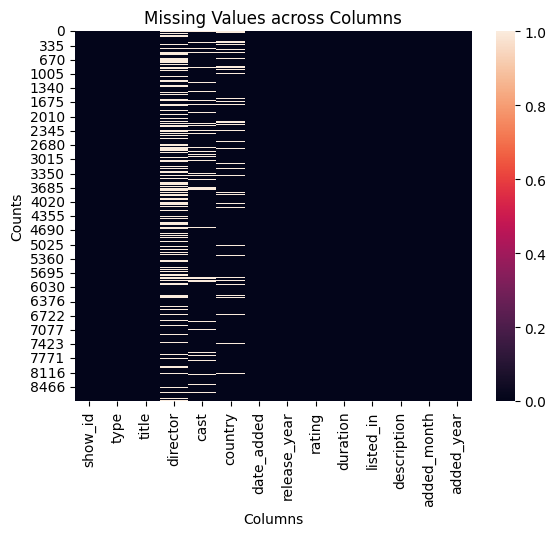

In [ ]:
# Display Null values count for each column.

sns.heatmap(df.isnull())
plt.title("Missing Values across Columns")
plt.xlabel("Columns")
plt.ylabel("Counts")
plt.show()


--------

In [ ]:
#Droping rows for columns "duration","rating","date_added",
# as they are having null values rest columns we deal later when we needed.

df.dropna(subset = ["duration","rating","date_added"],axis = 0 ,inplace = True)

In [ ]:
# Percentage of null values after drop
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending = False)

director        29.17
country          9.49
cast             9.39
show_id          0.00
type             0.00
title            0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
added_month      0.00
added_year       0.00
dtype: float64

In [ ]:
df.shape

(8702, 14)

--------

In [ ]:
# Display null values for columns "Country" and "Cast"

print(df["country"].isnull().sum())
print(df["cast"].isnull().sum())

826
817


There are 826 rows in the "country" column that contain null values.

And 817 rows in th "cast" column that contain null values.

So,

- Country: We will Fill these null values with "Unknown."
- Cast:  We will Fill these null values with "Unknown."



--------

In [ ]:
# Replace country and cast  null values with unknown
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [ ]:
df.iloc[:,-5:]

,duration,listed_in,description,added_month,added_year
0,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021
...,...,...,...,...,...
8802,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,2019
8803,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,2019
8804,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,2019
8805,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,2020


--------

In [ ]:
# Display Top 10 Countries which has produced most number of movies or TV_Shows.
df['country'].value_counts().head(10)

country
United States     2775
India              971
Unknown            826
United Kingdom     403
Japan              240
South Korea        195
Canada             173
Spain              141
France             122
Mexico             110
Name: count, dtype: int64

In [ ]:
# Display unique countries
split_countries = df['country'].str.split(', ')

all_countries = []

for countries in split_countries:
    all_countries.extend(countries)

unique_countries = list(set(all_countries))


print(unique_countries)
print(len(unique_countries))


['', 'Japan', 'Georgia', 'Bangladesh', 'Nicaragua', 'Morocco', 'Hong Kong', 'Vietnam', 'Cambodia', 'Pakistan', 'Liechtenstein', 'Kenya', 'Peru', 'Portugal', 'Mauritius', 'Singapore', 'Romania', 'Denmark', 'Soviet Union', 'Greece', 'Cayman Islands', 'Saudi Arabia', 'United Arab Emirates', 'Armenia', 'Colombia', 'Jamaica', 'Lebanon', 'Afghanistan', 'Finland', 'Palestine', 'Malta', 'United Kingdom', 'Somalia', 'Jordan', 'Switzerland', 'Italy', 'Mexico', 'Cameroon', 'Slovakia', 'Brazil', 'Mongolia', 'France', 'Taiwan', 'Ethiopia', 'United States,', 'United States', 'Ukraine', 'Argentina', 'Norway', 'Angola', 'Panama', 'Senegal', 'Azerbaijan', 'Iceland', 'Kazakhstan', 'East Germany', 'Russia', 'Nepal', 'Luxembourg', 'Slovenia', 'Austria', 'China', 'South Korea', 'Sweden', 'Malawi', 'Netherlands', 'Turkey', 'Burkina Faso', 'Ghana', 'Zimbabwe', 'Uruguay', 'Mozambique', 'Botswana', 'Chile', 'Namibia', 'Ecuador', 'South Africa', 'Bermuda', 'India', 'Dominican Republic', 'Bulgaria', 'Ireland', '

--------

In [ ]:
df["added_year"].min()

2008

## **Q1.How has the number of movies released per year changed over the last 20-30 years?**

In [ ]:
movies_df = df[df["type"] == "Movie"]

# Group data by release year and count the number of movies
movies_per_year = movies_df.groupby("release_year").size()

# Filter data for the last 30 years
last_30_years_movies = movies_per_year.tail(30)
last_30_years_movies

release_year
1992     20
1993     24
1994     20
1995     23
1996     21
1997     34
1998     32
1999     32
2000     33
2001     40
2002     44
2003     51
2004     55
2005     67
2006     82
2007     74
2008    113
2009    118
2010    153
2011    145
2012    173
2013    225
2014    264
2015    396
2016    658
2017    765
2018    767
2019    633
2020    517
2021    277
dtype: int64

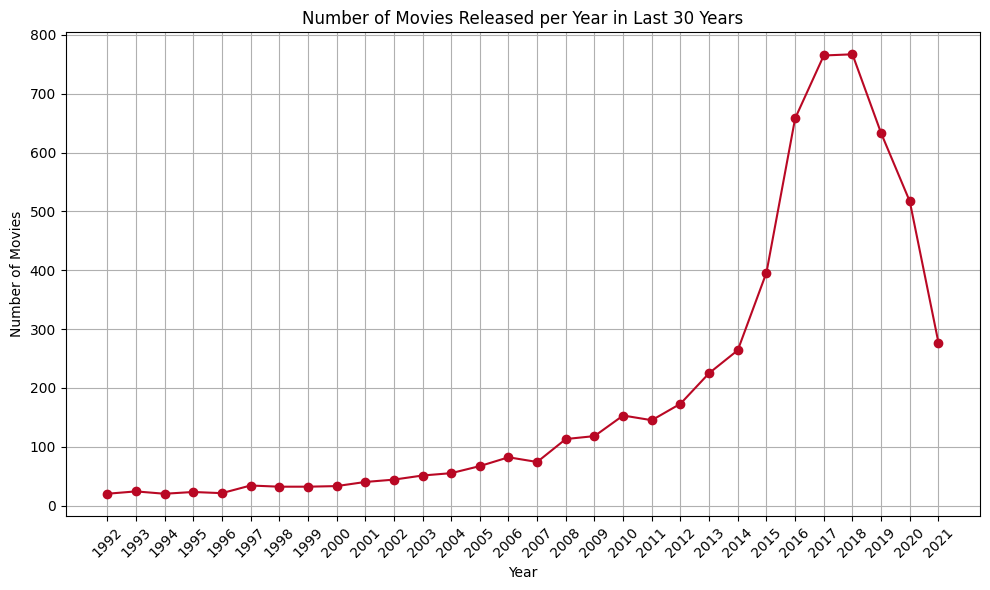

In [ ]:
movies_df = df[df["type"] == "Movie"]

# Group data by release year and count the number of movies
movies_per_year = movies_df.groupby("release_year").size()

# Filter data for the last 30 years
last_30_years_movies = movies_per_year.tail(30)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(last_30_years_movies.index, last_30_years_movies.values, marker="o", linestyle="-",color="#B90824")
plt.title("Number of Movies Released per Year in Last 30 Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.xticks(last_30_years_movies.index, rotation=45)
plt.tight_layout()
plt.show()


- The above graph shows Number of movies release for last 30 years.
- This is **Non-monotonic graph** : the graph that may increase, decrease, or remain unchanged at different points without following a strict upward or downward trend.
- The graph for number of movies from year 1992 to 2007 was moderate, Almost same number of movies used to release on these period.
- After 2008 the graph shoot up till 2018, means the count of movies increased between this period
- There can be multiple factors like **Marketing and Promotion Strategies,Technology, Financing, International market and Streaming platforms(Netflix , Amazon prime etc.)** to sudden growth in the number of movies released.
- The one reason for such a huge growth is Streaming platforms Netflix allowed more films to be produced and released directly to consumers.
- we can see there is sudden depth as well in the graph after 2018.
- There can be various factors responsible for depth of graph like **Pandemic Impact (COVID-19), Changes in Audience Behavior, Quality Over Quantity**

--------

## **Q2.	How has the number of TV-Shows released per year changed over the last 20-30 years?**

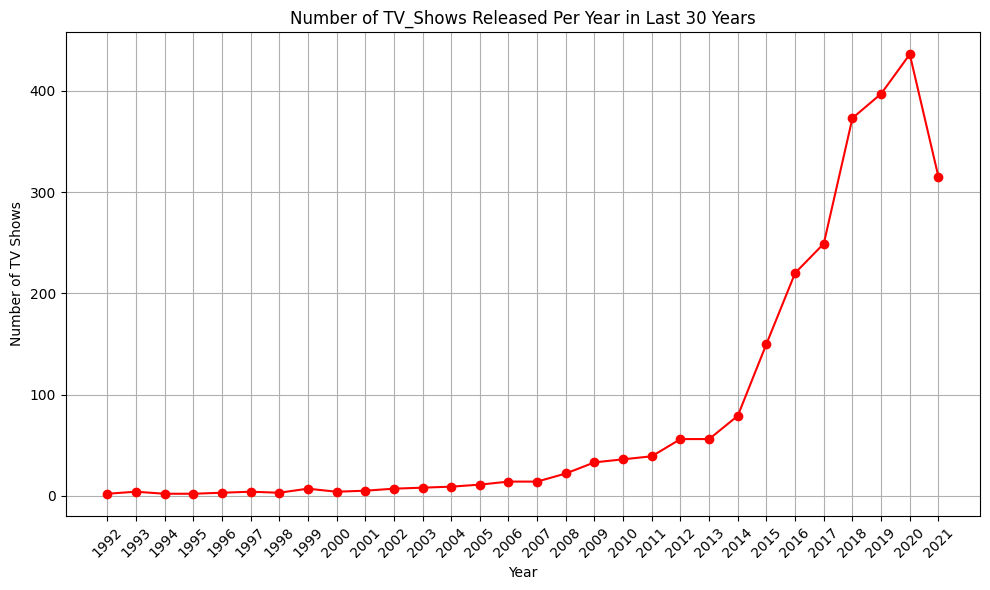

In [ ]:
TV_Show = df[df["type"]=="TV Show"]

TV_Shows_per_year = TV_Show.groupby("release_year").size()
last_30_years_Tv_Show = TV_Shows_per_year.tail(30)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(last_30_years_Tv_Show.index, last_30_years_Tv_Show.values, marker="o", linestyle="-", color="red")
plt.title("Number of TV_Shows Released Per Year in Last 30 Years")
plt.xlabel("Year")
plt.ylabel("Number of TV Shows")
plt.grid(True)
plt.xticks(last_30_years_Tv_Show.index, rotation=45)
plt.tight_layout()
plt.show()


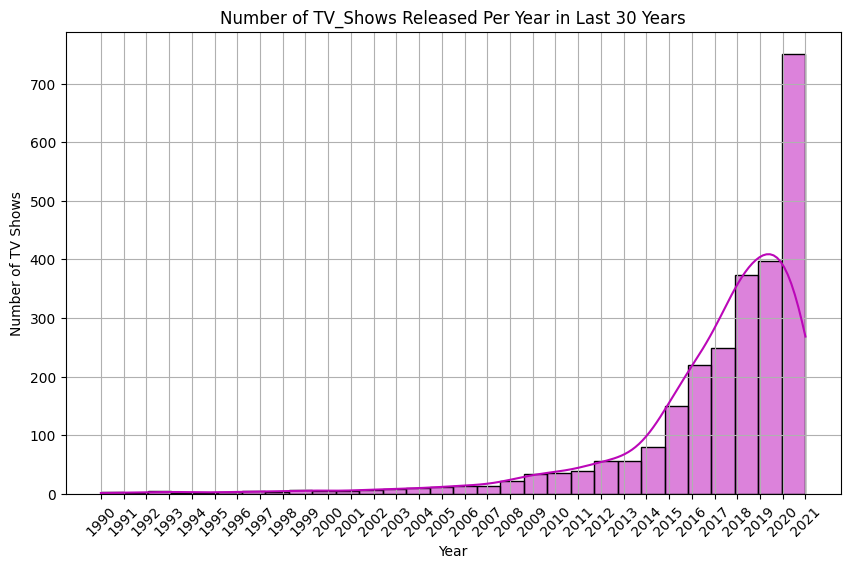

In [ ]:
TV_Show = df[(df["type"] == "TV Show") & (df["release_year"] >= 1990) ]

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=TV_Show, x="release_year", kde=True, bins=30, color="#BB07B8")
plt.title("Number of TV_Shows Released Per Year in Last 30 Years")
plt.xlabel("Year")
plt.ylabel("Number of TV Shows")
plt.grid(True)
plt.xticks(range(1990, 2022), rotation=45)

plt.show()


- The above graph shows Number of TV-Shows release for last 30 years.
- This is **Non-monotonic graph** : the graph that may increase, decrease, or remain unchanged at different points without following a strict upward or downward trend.
- The graph for number of TV-Shows from year 1990 to 2007 was moderate, Almost same number of movies used to release on these period.
- After 2008 the graph shoot up till 2020, means the count of TV_Shows increased between this period
- There can be multiple factors like **Marketing and Promotion Strategies,Technology, Financing, International market and Streaming platforms(Netflix , Amazon prime etc.)** to sudden growth in the number of TV-Shows released.
- The one reason for such a huge growth is Streaming platforms Netflix allowed more films to be produced and released directly to consumers.
- we can see there is sudden depth as well in the graph after 2020.
- There can be various factors responsible for depth of graph like **Pandemic Impact (COVID-19), Changes in Audience Behavior, Quality Over Quantity, Compatetion in streaming platforms, Other platforms may be delivering high-quality content etc**

--------

## **Q3.What is the distribution of movie and TV shows?**

In [ ]:
x = df["type"].value_counts()
x

type
Movie      6126
TV Show    2576
Name: count, dtype: int64

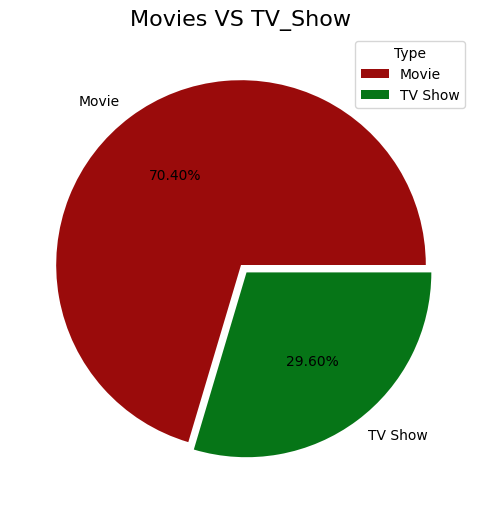

In [ ]:
x = df["type"].value_counts()

explode = (0,0.05)
colors = ["#9A0B0B","#067517"]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(x,labels=x.index,colors = colors ,autopct='%1.2f%%', explode=explode)
plt.title("Movies VS TV_Show", fontsize=16)
plt.legend(title="Type")

plt.show()

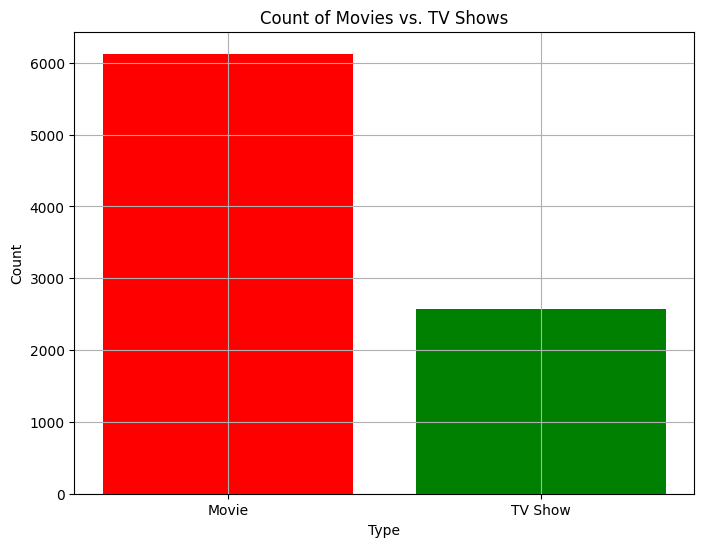

In [ ]:
count = df["type"].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(count.index,count.values,color=['red','green'])
plt.title("Count of Movies vs. TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()




The above two graphs shows the distribution of Movies vs Tv-Shows on the Netflix.
- Netflix offers 6126 movies, representing nearly 70% of its total content.
- Netflix provides 2664 TV shows, making up approximately 30% of its total content.
- **The reasons might be Vievers preference, Demand, Production cost, duration etc.**

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,2021


In [ ]:
df.iloc[:,-5:]

,duration,listed_in,description,added_month,added_year
0,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021
...,...,...,...,...,...
8802,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,2019
8803,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,2019
8804,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,2019
8805,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,2020


----------

## **Q4. How many TV Shows added on netflix per month?**

## **What is the best time to launch a TV show?**


In [ ]:
a = df[df["type"]=="TV Show"]
s = a.groupby("added_month")["rating"].count()
s

added_month
1     181
2     174
3     205
4     209
5     187
6     232
7     254
8     230
9     246
10    210
11    199
12    249
Name: rating, dtype: int64

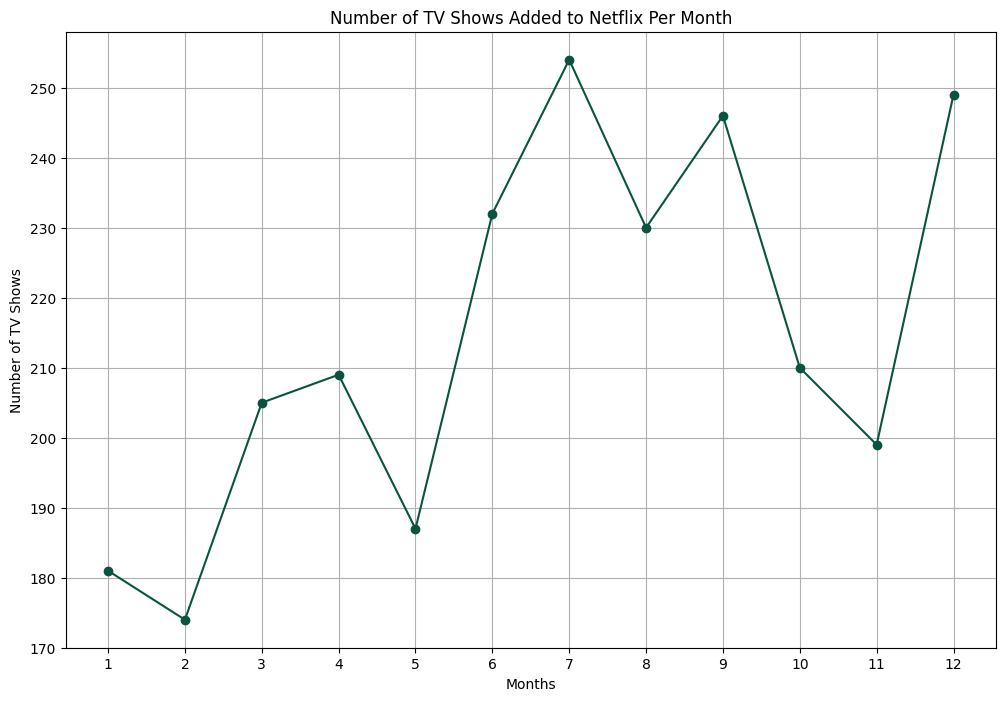

In [ ]:
tv_show = df[df["type"]=="TV Show"]
month = tv_show.groupby("added_month")["rating"].count()
month

plt.figure(figsize=(12,8))
plt.plot(month.index,month.values,marker = "o",color = "#085441")
plt.title("Number of TV Shows Added to Netflix Per Month")
plt.xlabel("Months")
plt.ylabel("Number of TV Shows")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

- The above graph shows Number of TV-Shows added on Netflix for each month across years.
- This is **Non-monotonic graph** : the graph that may increase, decrease, or remain unchanged at different points without following a strict upward or downward trend.
- On average approximately 193 TV shows added per month.
- June, July, September, December are months where most number of TV-Shows added as there might be a good vievership on these months
- So netflix should release more TV-Shows on these specific months to have more customer engagement.
- January, February months less TV-Shows are added so Netflix should release less TV-Shows on these months or improve some quality content.
- March, April, May are moderate months so Netfix should add some interseting content, or should run some Marketing and Promotion campaigns to attract more viewers these Months.

----------

## **Q5. What is the Disribution of rating for Movies ? What rating movies do viewers prefers the most?**


In [ ]:
movie_data = df[df["type"] == "Movie"].groupby("rating").size().sort_values(ascending = False).head(10)
movie_data

rating
TV-MA    2062
TV-14    1427
R         797
TV-PG     540
PG-13     490
PG        287
TV-Y7     139
TV-Y      131
TV-G      126
NR         75
dtype: int64

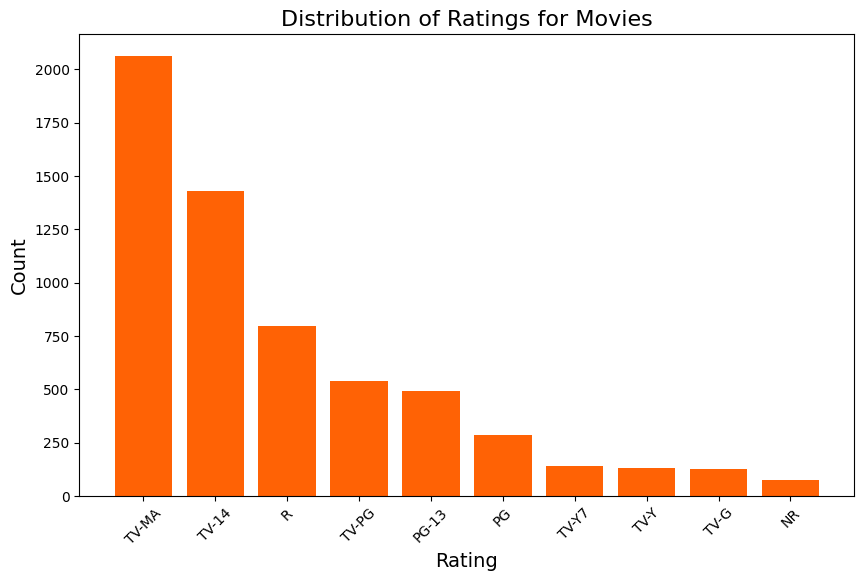

In [ ]:
movie_data = df[df["type"] == "Movie"].groupby("rating").size().sort_values(ascending = False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(movie_data.index,movie_data.values,color="#FF6205")
plt.title("Distribution of Ratings for Movies", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

- The above graph shows Number of Movies with diffrent Ratings watched on Netflix.
- Below table shows rating, its description and appropriate age.

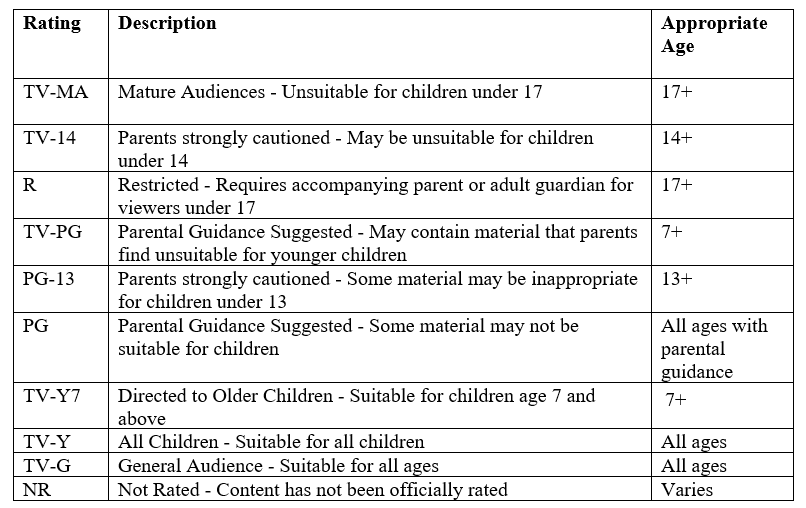

- TV-MA has more rating so Neflix should release, produce these rating movies as viewers are more engage towards this rating following by TV-14, R, and TV-PG rating.

--------

## **Q6. What is the Disribution of rating for Movies ? What rating TV-Shows do viewers prefers the most?**


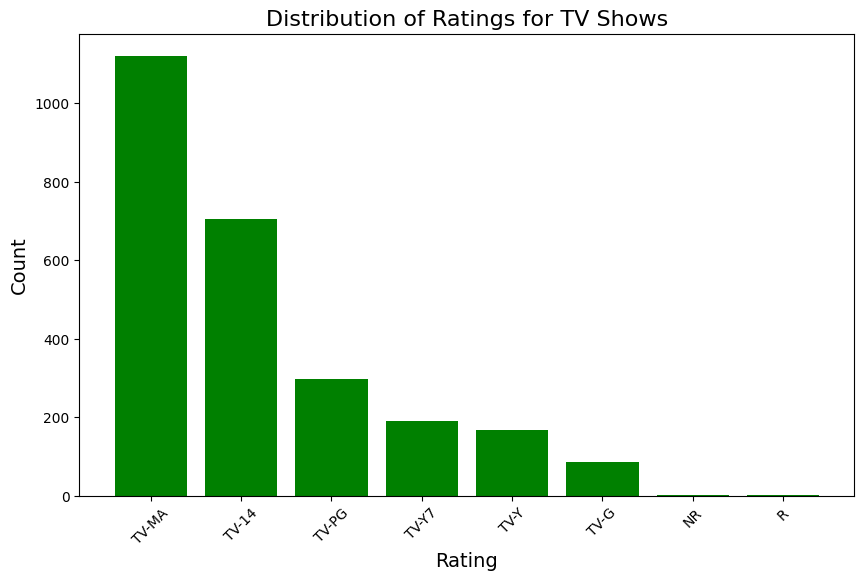

In [ ]:
tvshow_data = df[df["type"] == "TV Show"].groupby("rating").size().sort_values(ascending = False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(tvshow_data.index,tvshow_data.values,color = "green")
plt.title("Distribution of Ratings for TV Shows", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

- The above graph shows Number of TV-Shows with diffrent Ratings watched on Netflix.
- Below table shows rating, its description and appropriate age

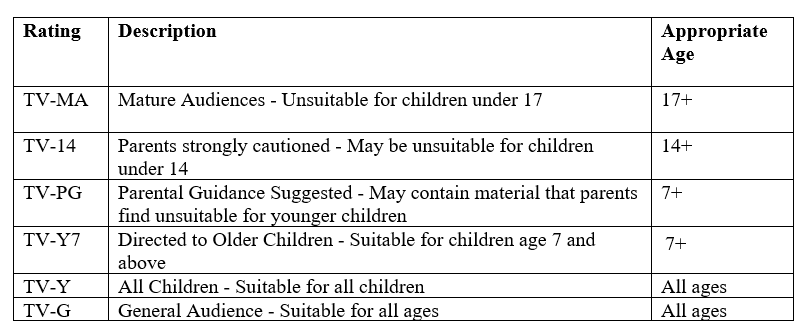

- Mature Audience is more engaged on netflix for TV-Shows following by TV-14 And TV-PG ratings
- So its clearly suggest that Audience are more attracted towards these rating so netflix should add more mumber of TV Shows with these ratings
- Netflix can also produce these rating movies on perticular months where their viewership drops for the months like January, February. (Refer previous graph).

--------

## **Q7. What are the top 20 genre movies or TV shows currently trending or highly rated on your Netflix?**

In [ ]:
df["listed_in"].value_counts().head(20)

listed_in
Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Children & Family Movies                             215
Kids' TV                                             212
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               137
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Ind

<ipython-input-124-8c0f9a8cb763>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values,y=genre_counts.index, palette = "viridis")


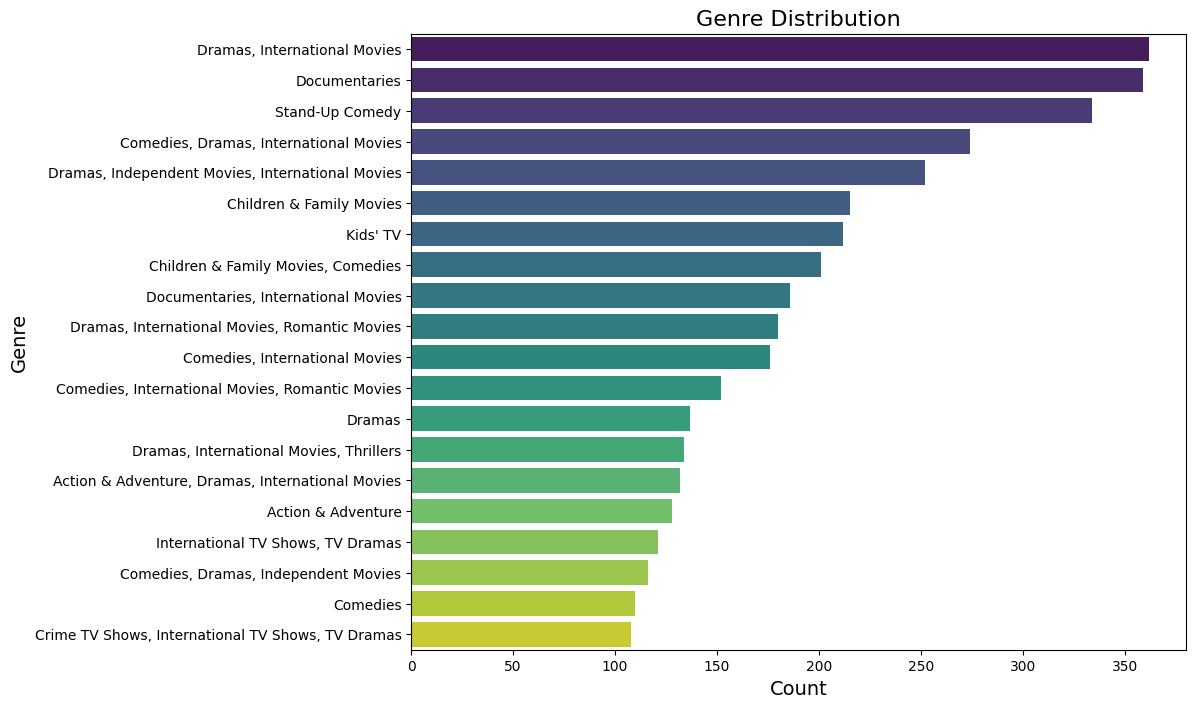

In [ ]:
genre_counts = df.groupby("listed_in")["rating"].count().sort_values(ascending = False).head(20)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.values,y=genre_counts.index, palette = "viridis")
plt.title("Genre Distribution", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.show()


- The graph above depicts the top 20 genres of movies and TV shows preferred by the audience.
- **Dramas, International Movies,Documentaries** genre has almost similar numbers, means audience like to watch these genre movies most.
- To enhance audience engagement, Netflix should prioritize producing more movies and TV shows in these genres, while also considering other genres shown in the graph.
- Crime TV shows currently have a lesser audience. Netflix should take steps to attract viewers to this genre by enhancing quality, actively seeking feedback, and implementing strategies to increase engagement.


--------

## **Q8. Who are the top 10 directors based on the number of movies and TV shows they have directed?**





In [ ]:
top_directors= df["director"].value_counts().sort_values(ascending = False).head(10)
top_directors

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

<ipython-input-126-5bfb1d98eb3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x =top_directors.values ,y = top_directors.index,palette = "rocket")


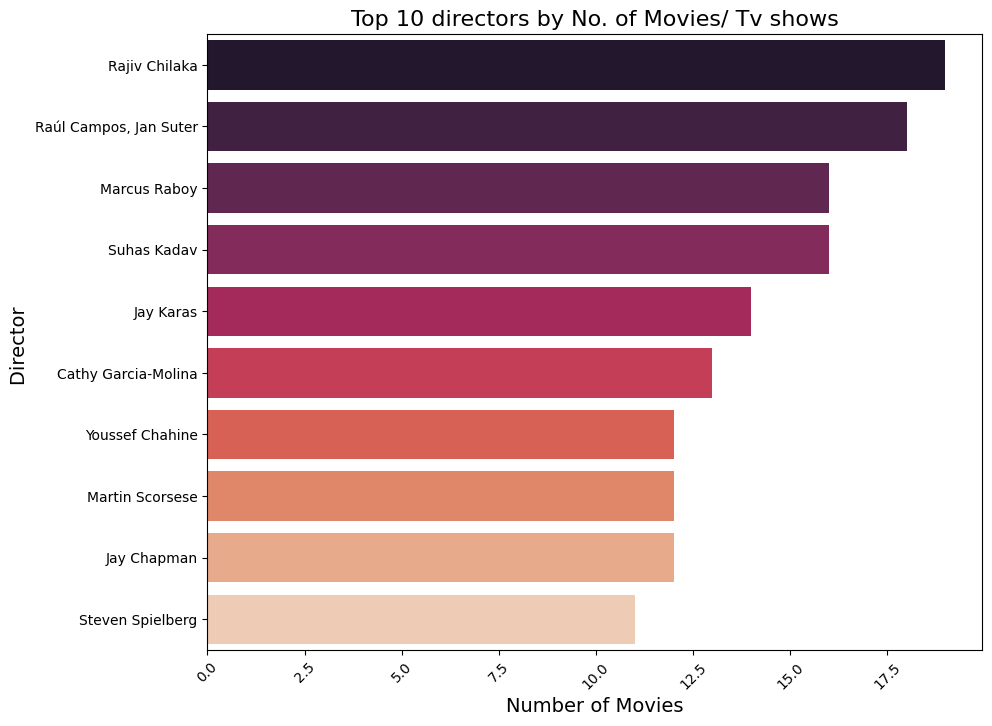

In [ ]:
top_directors= df["director"].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize = (10,8))
sns.barplot (x =top_directors.values ,y = top_directors.index,palette = "rocket")
plt.title("Top 10 directors by No. of Movies/ Tv shows", fontsize=16)
plt.xlabel("Number of Movies", fontsize=14)
plt.ylabel("Director ", fontsize=14)
plt.xticks(rotation=45)
plt.show()

- The given Graph shows Top 10 Directors with most number of Movies/TV-Shows.
- Director Rajiv Chilaka has most number of movies directed with count of
- Director Raul campos and Jan Suter has same number of movies directed as

--------

## **Q9. Does Netflix has more focus on TV Shows than movies in recent years ?**

In [ ]:
TV_Show = df[df["type"]=="TV Show"]

TV_Shows_added_count = TV_Show.groupby("added_year")["title"].count()
tvs = TV_Shows_added_count.tail(8)
tvs

added_year
2014      4
2015     17
2016    164
2017    325
2018    387
2019    575
2020    594
2021    505
Name: title, dtype: int64

In [ ]:
movies = df[df["type"]=="Movie"]
movies_added_count = movies.groupby("added_year")["title"].count()
mvs = movies_added_count.tail(8)
mvs

added_year
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: title, dtype: int64

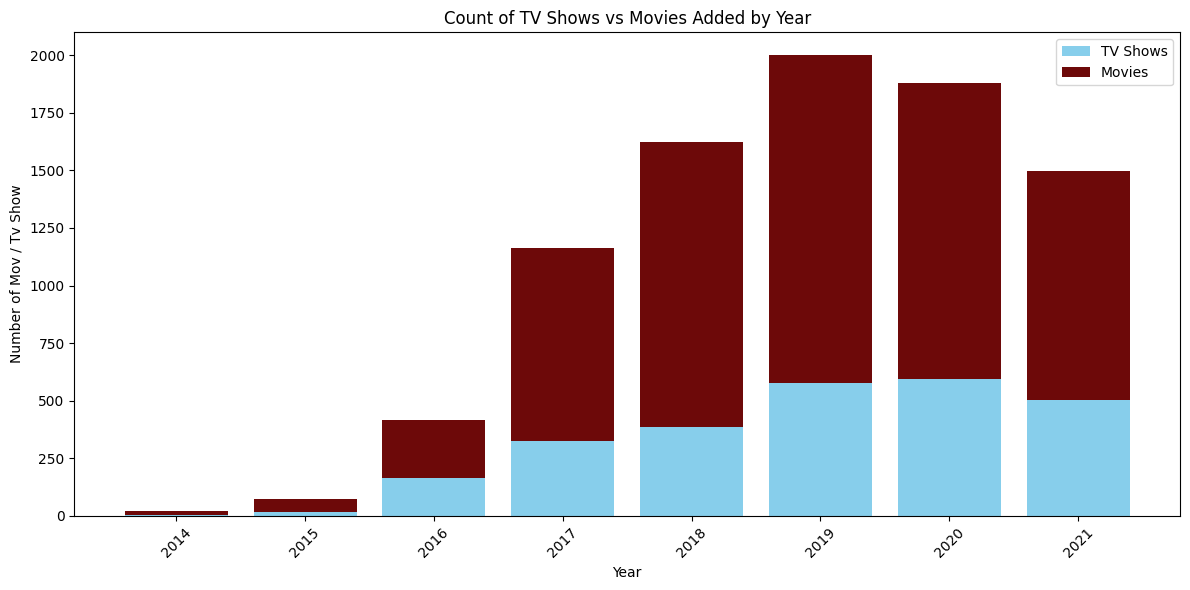

In [ ]:
plt.figure(figsize=(12, 6))

# Plot TV shows
plt.bar(tvs.index, tvs.values, color="skyblue", label="TV Shows")

# Plot movies
plt.bar(mvs.index, mvs.values, bottom=tvs.values, color="#6D0909", label="Movies")

# Adding labels and titles
plt.title("Count of TV Shows vs Movies Added by Year")
plt.xlabel("Year")
plt.ylabel("Number of Mov / Tv Show")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


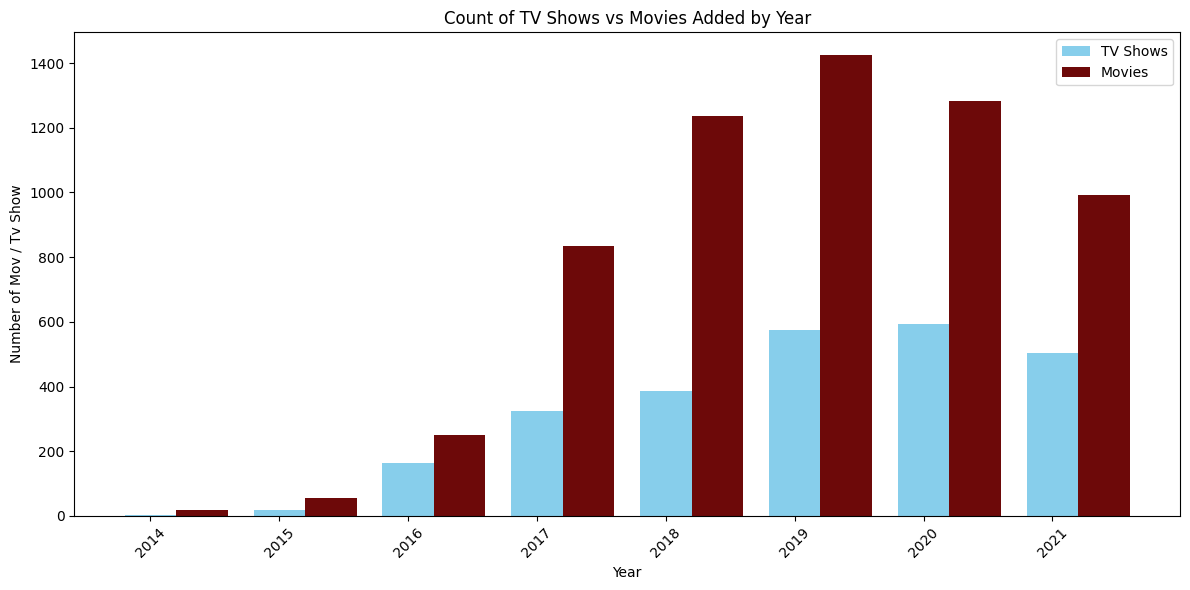

In [ ]:
plt.figure(figsize=(12, 6))

# Plot TV shows
plt.bar(tvs.index, tvs.values, width=0.4, color="skyblue", label="TV Shows")

# Plot movies
plt.bar(mvs.index+ 0.4, mvs.values, width=0.4, color="#6D0909", label="Movies")

# Adding labels and titles
plt.title("Count of TV Shows vs Movies Added by Year")
plt.xlabel("Year")
plt.ylabel("Number of Mov / Tv Show")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


- The above graphs illustrate the comparison between the number of movies and TV shows added to Netflix over the past 8 years.
- From the graphs, it is suggesting that more movies have been added compared to TV shows.
- The higher number of movies compared to TV shows can be due to several factors such as:

    * **Viewer Preferences:** Viewers prefer watching movies over TV shows.
    * **Production Timelines:** Movies typically have shorter production  timelines compared to TV shows, allowing Netflix to release them more frequently.
    * **Genre Diversity:** Movies span a wide range of genres and styles, providing Netflix with opportunities to appeal to diverse audience segments.
- To increase viewers engagements towars TV-Shows netflix can take feedback, Release more TV-Shows with same genre as Movies, Poduce less duration(Seasons) TV-Showsetc.




--------

## **Q10. Which are the top 10 countries in terms of movie viewership OR production ?**

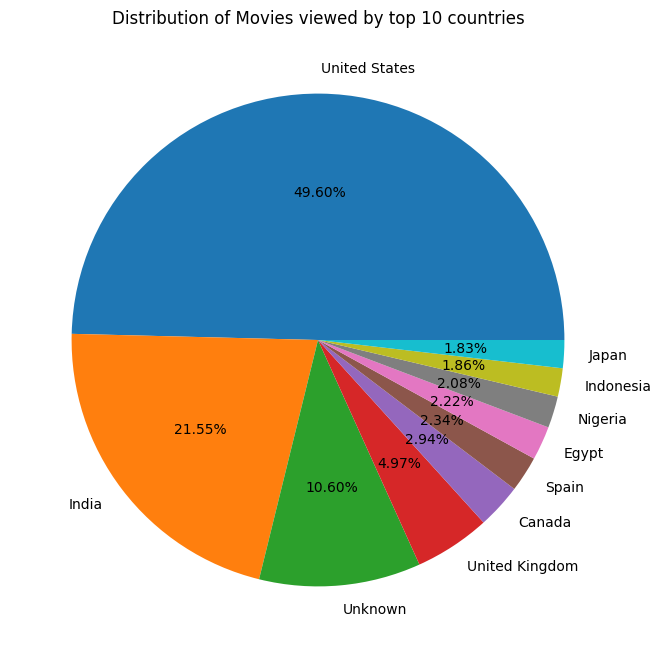

In [ ]:
Movies = df[df["type"]=="Movie"]
Country_Wise_Movies = Movies.groupby("country")["title"].count().sort_values(ascending = False).head(10)

plt.figure(figsize = (10,8))
plt.pie(Country_Wise_Movies, labels = Country_Wise_Movies.index,autopct = "%1.2f%%")
plt.title("Distribution of Movies viewed by top 10 countries")
plt.show()

- The above pie chart shows the distribution of Movies viewed/Produced by to 10 Countries in the world.
- Unites States Has the highest number of viewership/ Production of movies in the world with approximate 49%
- India is the second highest country in terms of viewership/Production of movies with approximate 22%.
- Japan and Indonesia has less than 2% of viewership which is less in the whole world
- Less viewership can be increase by several strategies including

    *   producing local content,
    *   Marketing campaign,
    *   Viewers feedback,
    *    Subtitles and dubbing, etc.


--------

## **Q11. Which are the top 10 countries in terms of TV-Show viewership OR production ?**

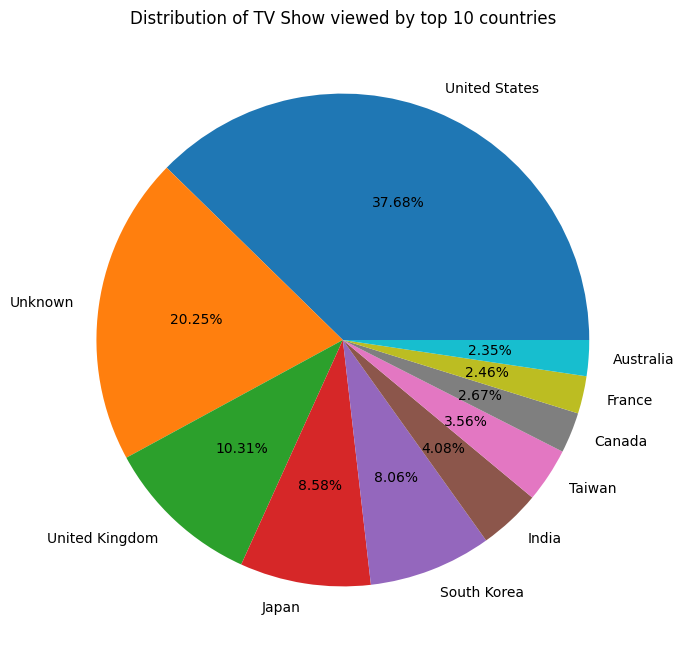

In [ ]:
Movies = df[df["type"]=="TV Show"]
Country_Wise_Movies = Movies.groupby("country")["title"].count().sort_values(ascending = False).head(10)

plt.figure(figsize = (10,8))
plt.pie(Country_Wise_Movies, labels = Country_Wise_Movies.index,autopct = "%1.2f%%")
plt.title("Distribution of TV Show viewed by top 10 countries")
plt.show()

- The above pie chart shows the distribution of TV-Shows viewed/Produced by to 10 Countries in the world.
- Unites States Has the highest number of viewership/ Production of TV-Shows in the world with approximate 38%
- United Kingdom is the second highest country in terms of viewership/Production of movies with approximate 11%.
- Australia, France and Canada has less than 3% of viewership which is less in the whole world
- Less viewership can be increase by several strategies including
    *   producing local content,
    *   Marketing campaign,
    *   Viewers feedback,
    *   Subtitles and dubbing, etc.





In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


--------

## **Q12. What is the comparision between Movies and TV Shows in terms of Rating ?**

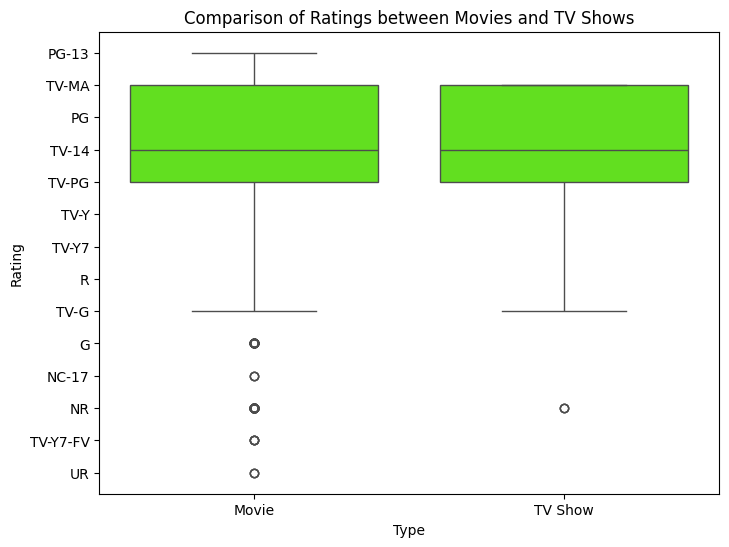

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="rating", data=df,color = "#58FF00")
plt.title("Comparison of Ratings between Movies and TV Shows")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

--------

##  **Q.13 Can you find out which country has more intersted in which genere in Movies?**

**OR**

## **Q13. What genres Movies are most watched in different countries?(Give Top 10 Countries)**

In [ ]:
movie_data = df[df["type"] == "Movie"]
m = movie_data.groupby("country")["listed_in"].value_counts().sort_values(ascending = False).head(50)

unique_countries_data = m.reset_index().drop_duplicates(subset="country")
print(unique_countries_data)


           country                                          listed_in  count
0    United States                                      Documentaries    249
2            India             Comedies, Dramas, International Movies    120
10         Unknown                           Children & Family Movies     70
21  United Kingdom                                      Documentaries     40
30           Japan  Action & Adventure, Anime Features, Internatio...     32
32           Egypt                     Comedies, International Movies     29
35          Turkey                     Comedies, International Movies     23
42       Indonesia      Dramas, International Movies, Romantic Movies     21
43     Philippines      Dramas, International Movies, Romantic Movies     21
49         Nigeria                       Dramas, International Movies     19


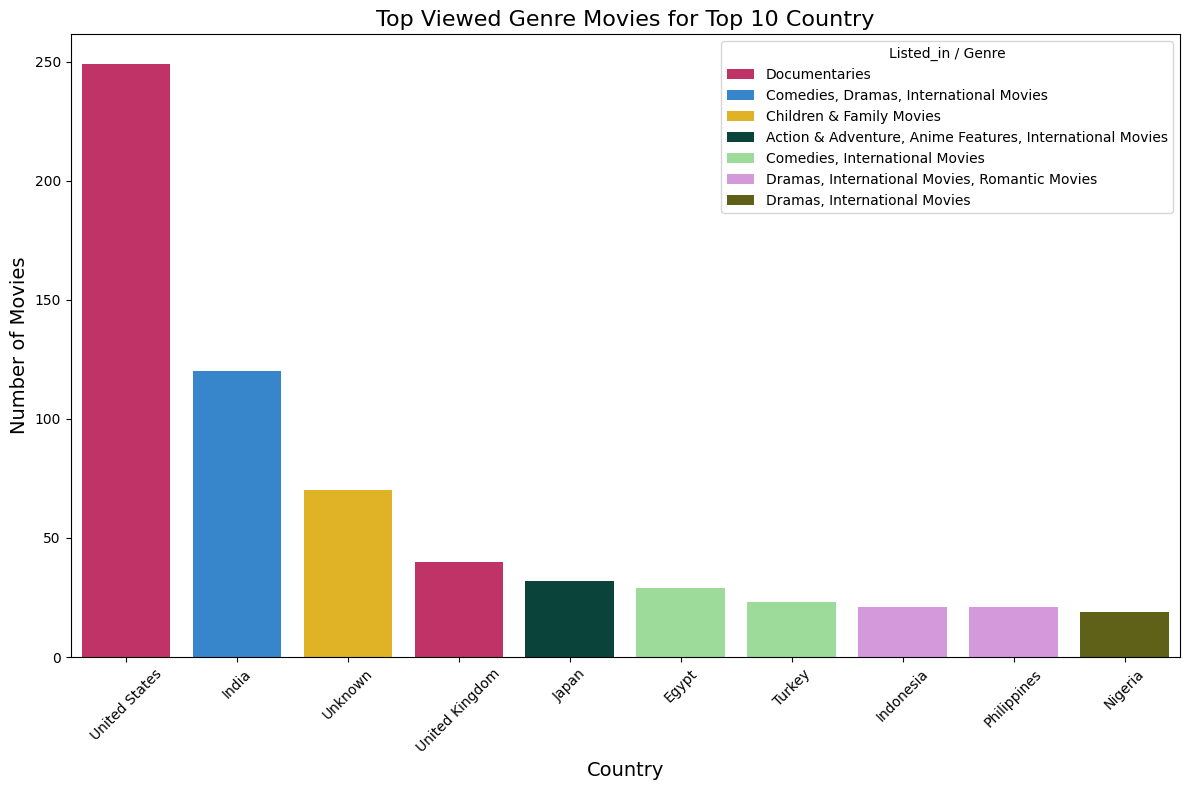

In [ ]:
colors = ["#D81B60","#1E88E5","#FFC107","#004D40","#92E68E","#DD8EE6","#6C6D0D"]

plt.figure(figsize=(12, 8))
sns.barplot(x="country", y="count", hue="listed_in", data=unique_countries_data, palette = colors)
plt.title("Top Viewed Genre Movies for Top 10 Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Listed_in / Genre", loc="upper right")
plt.tight_layout()
plt.show()


- The graph above illustrates how movie genre preferences vary across different countries.
- In the United States, there is a strong preference for Documentary movies, suggesting that Netflix should increase its production,promotion and expand content of documentaries for American viewers.

- In India, comedy, drama, and international movies are particularly popular among audiences. Therefore, Netflix should prioritize these genres to better engage with the Indian audience.

- Likewise, for each country represented in the graph, Netflix should consider increasing their content by adding, releasing, producing, and recommending more movies that are align with the specific genre preferences of those regions.

------

##  **Q.14. Can you find out which country has more intersted in which genere in TV-Shows?**

**OR**

## **Q14. What genres TV-Shows are most watched in different countries?(Give Top 10 Countries)**

In [ ]:
TV_Show_data = df[df["type"] == "TV Show"]
tv = TV_Show_data.groupby("country")["listed_in"].value_counts().sort_values(ascending = False).head(40)

data_unique_countries = tv.reset_index().drop_duplicates(subset="country")
print(data_unique_countries)

           country                                          listed_in  count
0    United States                                           Kids' TV     74
1            Japan               Anime Series, International TV Shows     72
3      South Korea  International TV Shows, Korean TV Shows, Roman...     63
7          Unknown                                           Kids' TV     42
10          Taiwan  International TV Shows, Romantic TV Shows, TV ...     31
13  United Kingdom  British TV Shows, Docuseries, International TV...     26
22          Mexico  Crime TV Shows, International TV Shows, Spanis...     17
29           Spain  Crime TV Shows, International TV Shows, Spanis...     14
37        Colombia  Crime TV Shows, International TV Shows, Spanis...     11
38           India                  International TV Shows, TV Dramas     11


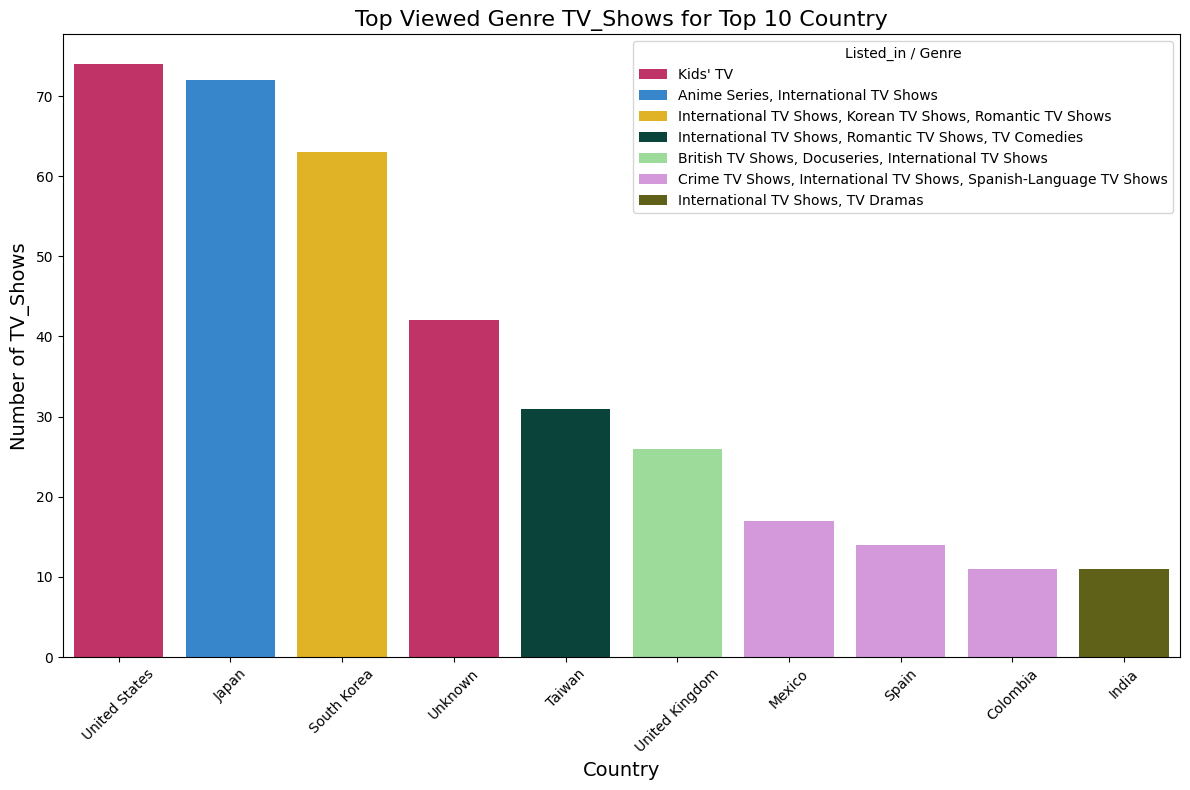

In [ ]:
colors = ["#D81B60","#1E88E5","#FFC107","#004D40","#92E68E","#DD8EE6","#6C6D0D"]

plt.figure(figsize = (12,8))
sns.barplot(x = "country", y = "count",hue="listed_in",data = data_unique_countries, palette = colors)
plt.title("Top Viewed Genre TV_Shows for Top 10 Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of TV_Shows", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Listed_in / Genre", loc="upper right")
plt.tight_layout()
plt.show()

- The graph above illustrates how TV-Shows genre preferences vary across different countries.
- In the United States, there is a strong preference for Kids-TV genre , suggesting that Netflix should increase its production,promotion and expand content of documentaries for American viewers.

- In Japan, Anime series, International TV Shows are particularly popular among audiences. Therefore, Netflix should prioritize these genres to better engage with the Indian audience.

- Likewise, for each country represented in the graph, Netflix should consider increasing their content by adding, releasing, producing, and recommending more movies that are align with the specific genre preferences of those regions.

------

## **Q15. Does the duration of movies affect their viewership ?**

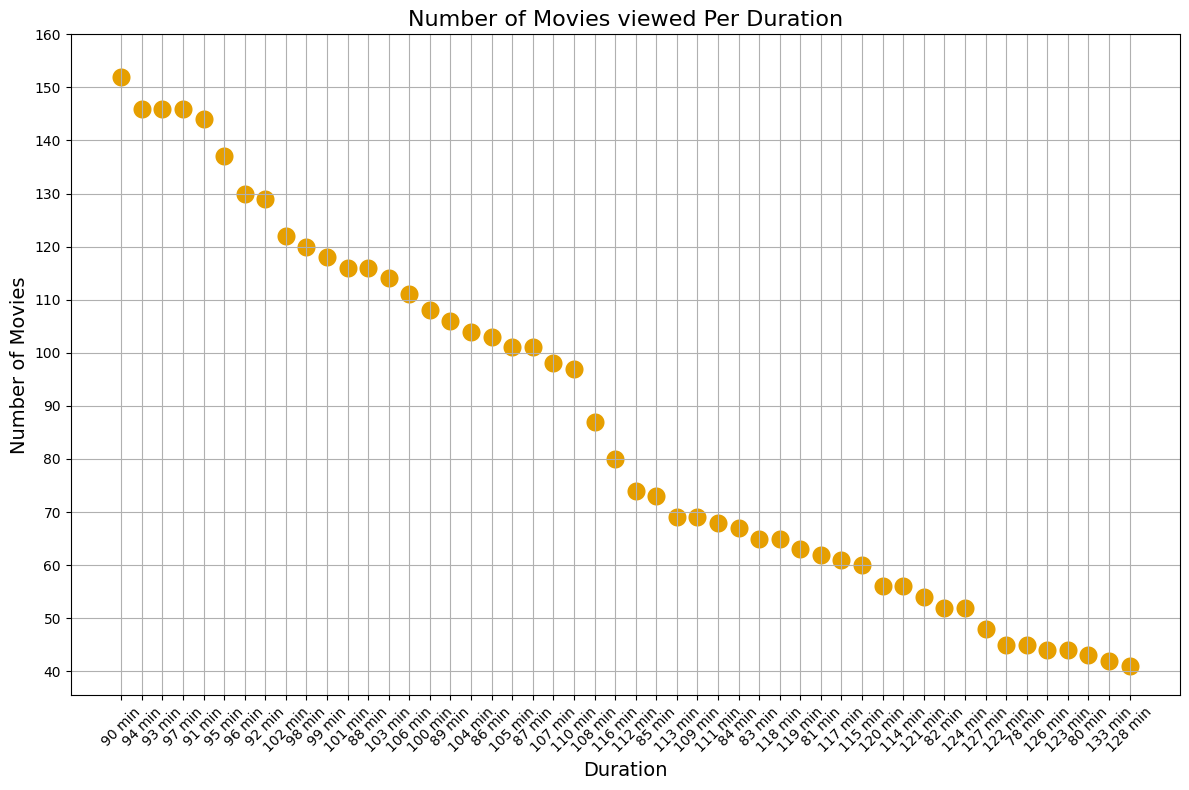

In [ ]:
mv = df.loc[df["type"]=="Movie"]
mvs = mv["duration"].value_counts().head(50)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=mvs.index, y=mvs.values, s=200, color="#E69F00")
plt.title("Number of Movies viewed Per Duration", fontsize=16)
plt.xlabel("Duration", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(list(range(40, 170,10)))
plt.grid(True)
plt.tight_layout()
plt.show()


- The above graph illustrates the relationship between movie duration and viewership.

- The X-axis represents the number of movies watched by the audience.

- The Y-axis represents the duration of the movies.

- It shows that movies with shorter durations tend to attract more viewership, while movies with longer durations experience lower viewership.

- This pattern suggests that shorter movies are preferred by audiences, whereas longer movies are less preffered.

- Based on this observation, Netflix should consider producing more movies with shorter durations to enhance viewership engagement.

------

## **Q16. Does the duration of TV-Shows affect their viewership ?**

In [ ]:
tv = df.loc[df["type"]== "TV Show"]
tv['duration'].value_counts().sort_values(ascending = False).head(15)

duration
1 Season      1789
2 Seasons      384
3 Seasons      178
4 Seasons       89
5 Seasons       55
6 Seasons       30
7 Seasons       18
8 Seasons       13
9 Seasons        8
10 Seasons       5
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
Name: count, dtype: int64

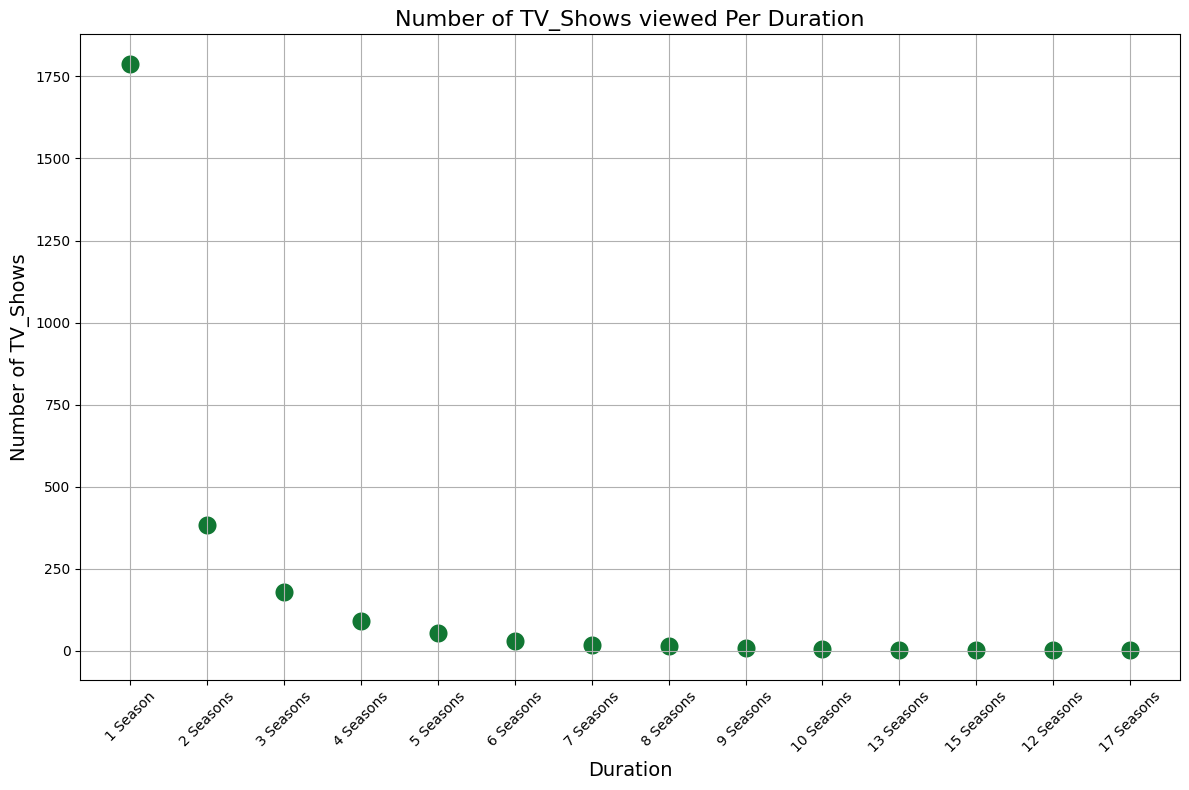

In [ ]:
tv = df.loc[df["type"]== "TV Show"]
tvs = tv["duration"].value_counts()

plt.figure(figsize=(12,8))
sns.scatterplot(x = tvs.index, y = tvs.values, s=200,color = "#117733")
plt.title("Number of TV_Shows viewed Per Duration", fontsize=16)
plt.xlabel("Duration", fontsize=14)
plt.ylabel("Number of TV_Shows", fontsize=14)
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()




- The above graph illustrates the relationship between TV-Shows duration (seasons) and viewership.

- The X-axis represents the number of TV-Shows watched by the audience.

- The Y-axis represents the duration(Seasons) of the movies.


- Season 1 of the TV show has a viewership of 1789 as watched season, but there was a significant drop to 384 viewers for Season 2, and the drops continues as we go ahead with the seasons (Duration) which represents that->.

    * It shows that TV-Shows with shorter durations (Seasons) tend to attract more viewership, while TV-Shows with longer durations experience lower viewership.
    * This pattern suggests that shorter TV-Shows are preferred by audiences, whereas longer TV-Shows are less preffered.

- Based on this observation, Netflix should consider producing more TV-Shows with shorter durations to enhance viewership engagement.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


------

## **Q17. Is there any relation between release year with respect to rating and type ?**

In [ ]:
g = df[df["type"]=="Movie"]
g.groupby("added_year")["title"].count()

added_year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: title, dtype: int64

In [ ]:
g = df[df["type"]=="TV Show"]
g.groupby("added_year")["title"].count()

added_year
2008      1
2013      4
2014      4
2015     17
2016    164
2017    325
2018    387
2019    575
2020    594
2021    505
Name: title, dtype: int64

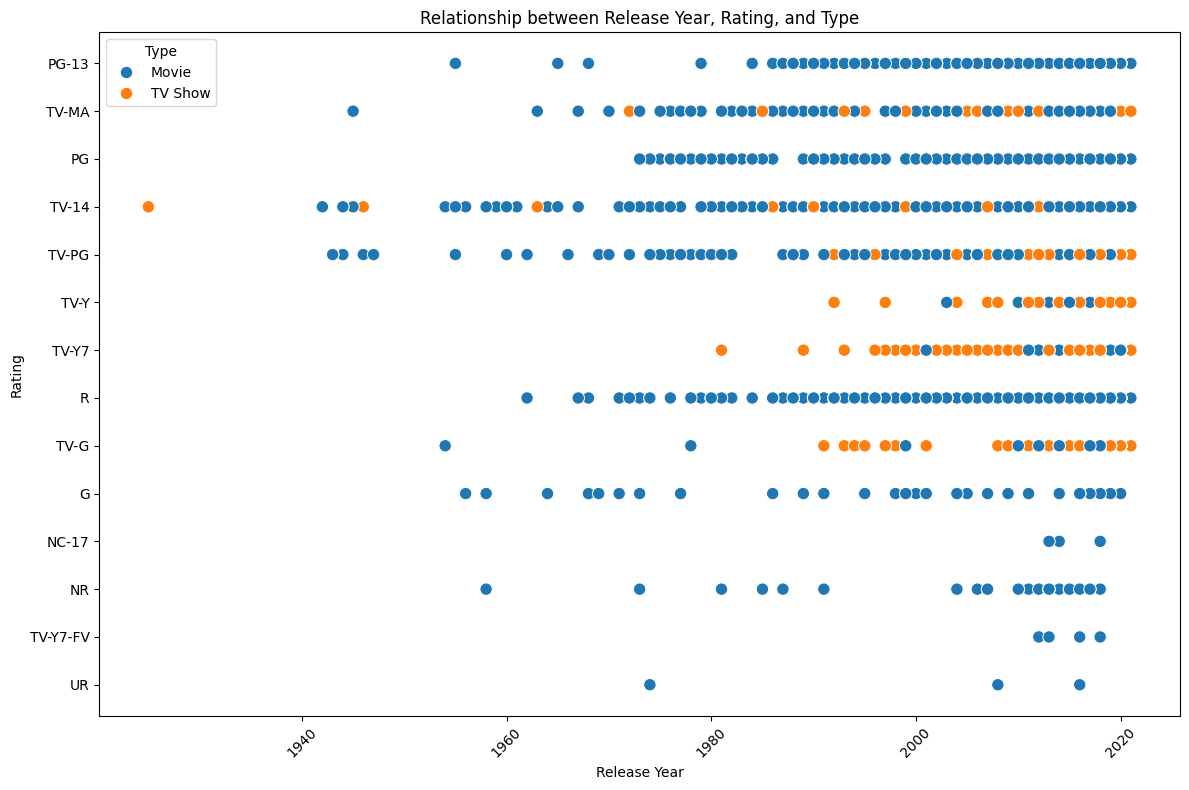

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x="release_year", y="rating", hue="type", data=df, s=80)

plt.title("Relationship between Release Year, Rating, and Type")
plt.xlabel("Release Year")
plt.ylabel("Rating")
plt.legend(title="Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The above graph shows the relationship between release year,rating and type.
- The graph clearly indicates that more movies were released than TV-Shows over the years.
- From that  PG13, TV-MA, PG,TV14, TV-PG rating movies were more released over years indicating audience preference towards these ratings.
- Also TV-Y and TV-Y7 rating TVShows were more released over the years indicating audience likes to watch these rating TV-Shows.

- The above graph illustrates how release year, rating, and type are interconnected.
- The graph indicates that movies have higher number than TV shows in terms of releases over the years.
- Movies rated PG-13, TV-MA, PG, TV-14, and TV-PG have been increasingly released over time, suggesting a clear audience preference for these ratings.
- Similarly, TV shows rated TV-Y and TV-Y7 have seen higher releases over the years, indicating audience preference for these rating categories in TV-Shows.

------

## **Q18. How many TV shows are added to Netflix each month, categorized by rating ?**

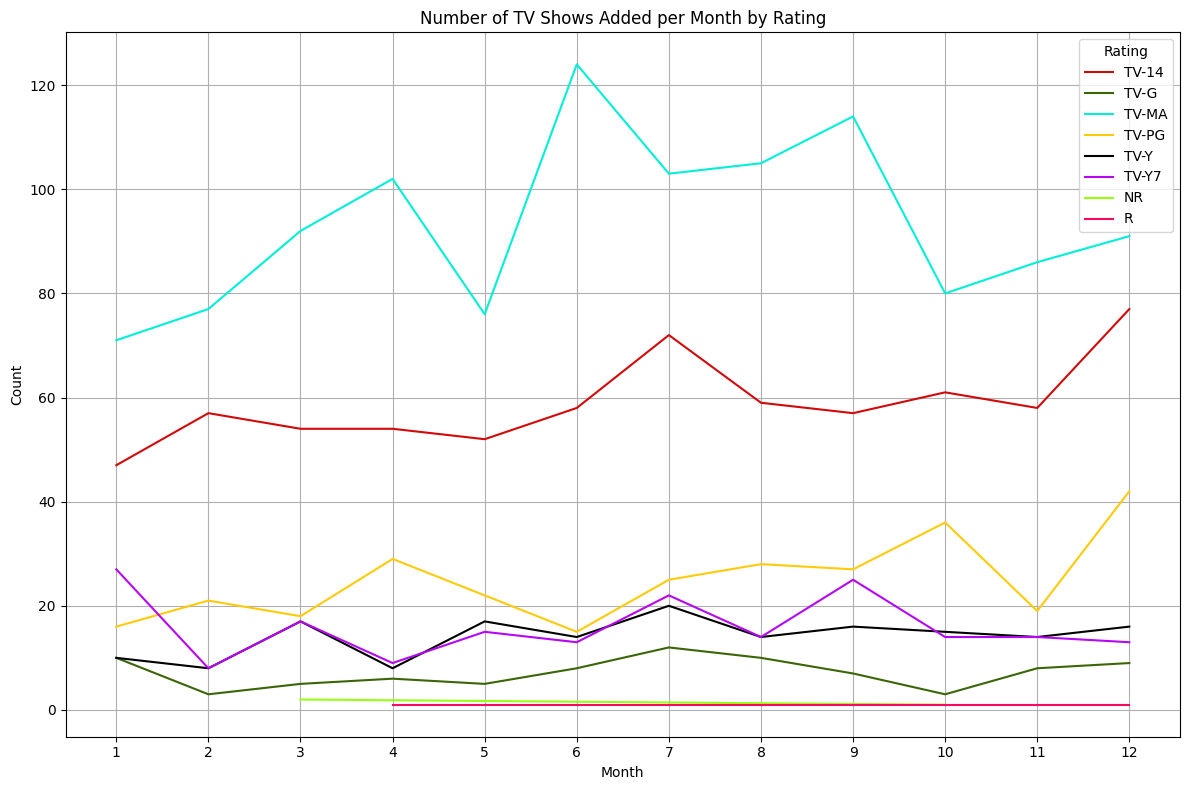

In [ ]:
tv_show = df[df["type"]=="TV Show"]

plt.figure(figsize=(12, 8))
# Aggregate the count of TV shows by added_month and rating
count_by_month_rating = tv_show.groupby(["added_month", "rating"]).size().reset_index(name="count")
colors = ["#D20909","#3C6507","#00EFD7","#FFCB08","#000000","#B607F1","#99FF11","#F90A61"]

sns.lineplot(x="added_month", y="count", data=count_by_month_rating, hue="rating", palette=colors)
plt.title("Number of TV Shows Added per Month by Rating")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(1, 13))
plt.legend(title="Rating", loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


- The graph above shows the monthly addition of TV shows on Netflix categorized by rating.
- TV-MA has the highest number of TV shows added on Netflix, particularly in June month.
- TV-14 follows with the second highest number of TV shows added on Netflix, especially in July month.
- NR and R ratings show negligible additions of TV shows on Netflix throughout the months.